In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as grp
from folium import plugins
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')



  We import all libraries which we may need for project

In [2]:
data= pd.read_csv('M20_P5_heartdisease_data.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [3]:
data.rename(columns={'num':'Classification'}, inplace=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Classification
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


We change Num Column name to Classification for our convinience only which will be our Y label or output column

In [4]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Classification
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,False,False,False,False
197,False,False,False,False,False,False,False,False,False,False,False,False,False,False
198,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
data.isnull().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
Classification    0
dtype: int64

We checked here for null value but it show nothing where can see easily value with '?' and it may affect our result in future we will change that value

In [6]:
data.describe()

,age,sex,cp,restecg,Classification
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


For Heart disease Age is main factor and mean of Age is 59.3 where sex has .97
Also with respect to health condition we also need to see CP and restecg which have 3.505 and 0.735 Respectively

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             200 non-null    int64 
 1   sex             200 non-null    int64 
 2   cp              200 non-null    int64 
 3   trestbps        200 non-null    object
 4   chol            200 non-null    object
 5   fbs             200 non-null    object
 6   restecg         200 non-null    int64 
 7   thalach         200 non-null    object
 8   exang           200 non-null    object
 9   oldpeak         200 non-null    object
 10  slope           200 non-null    object
 11  ca              200 non-null    object
 12  thal            200 non-null    object
 13  Classification  200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


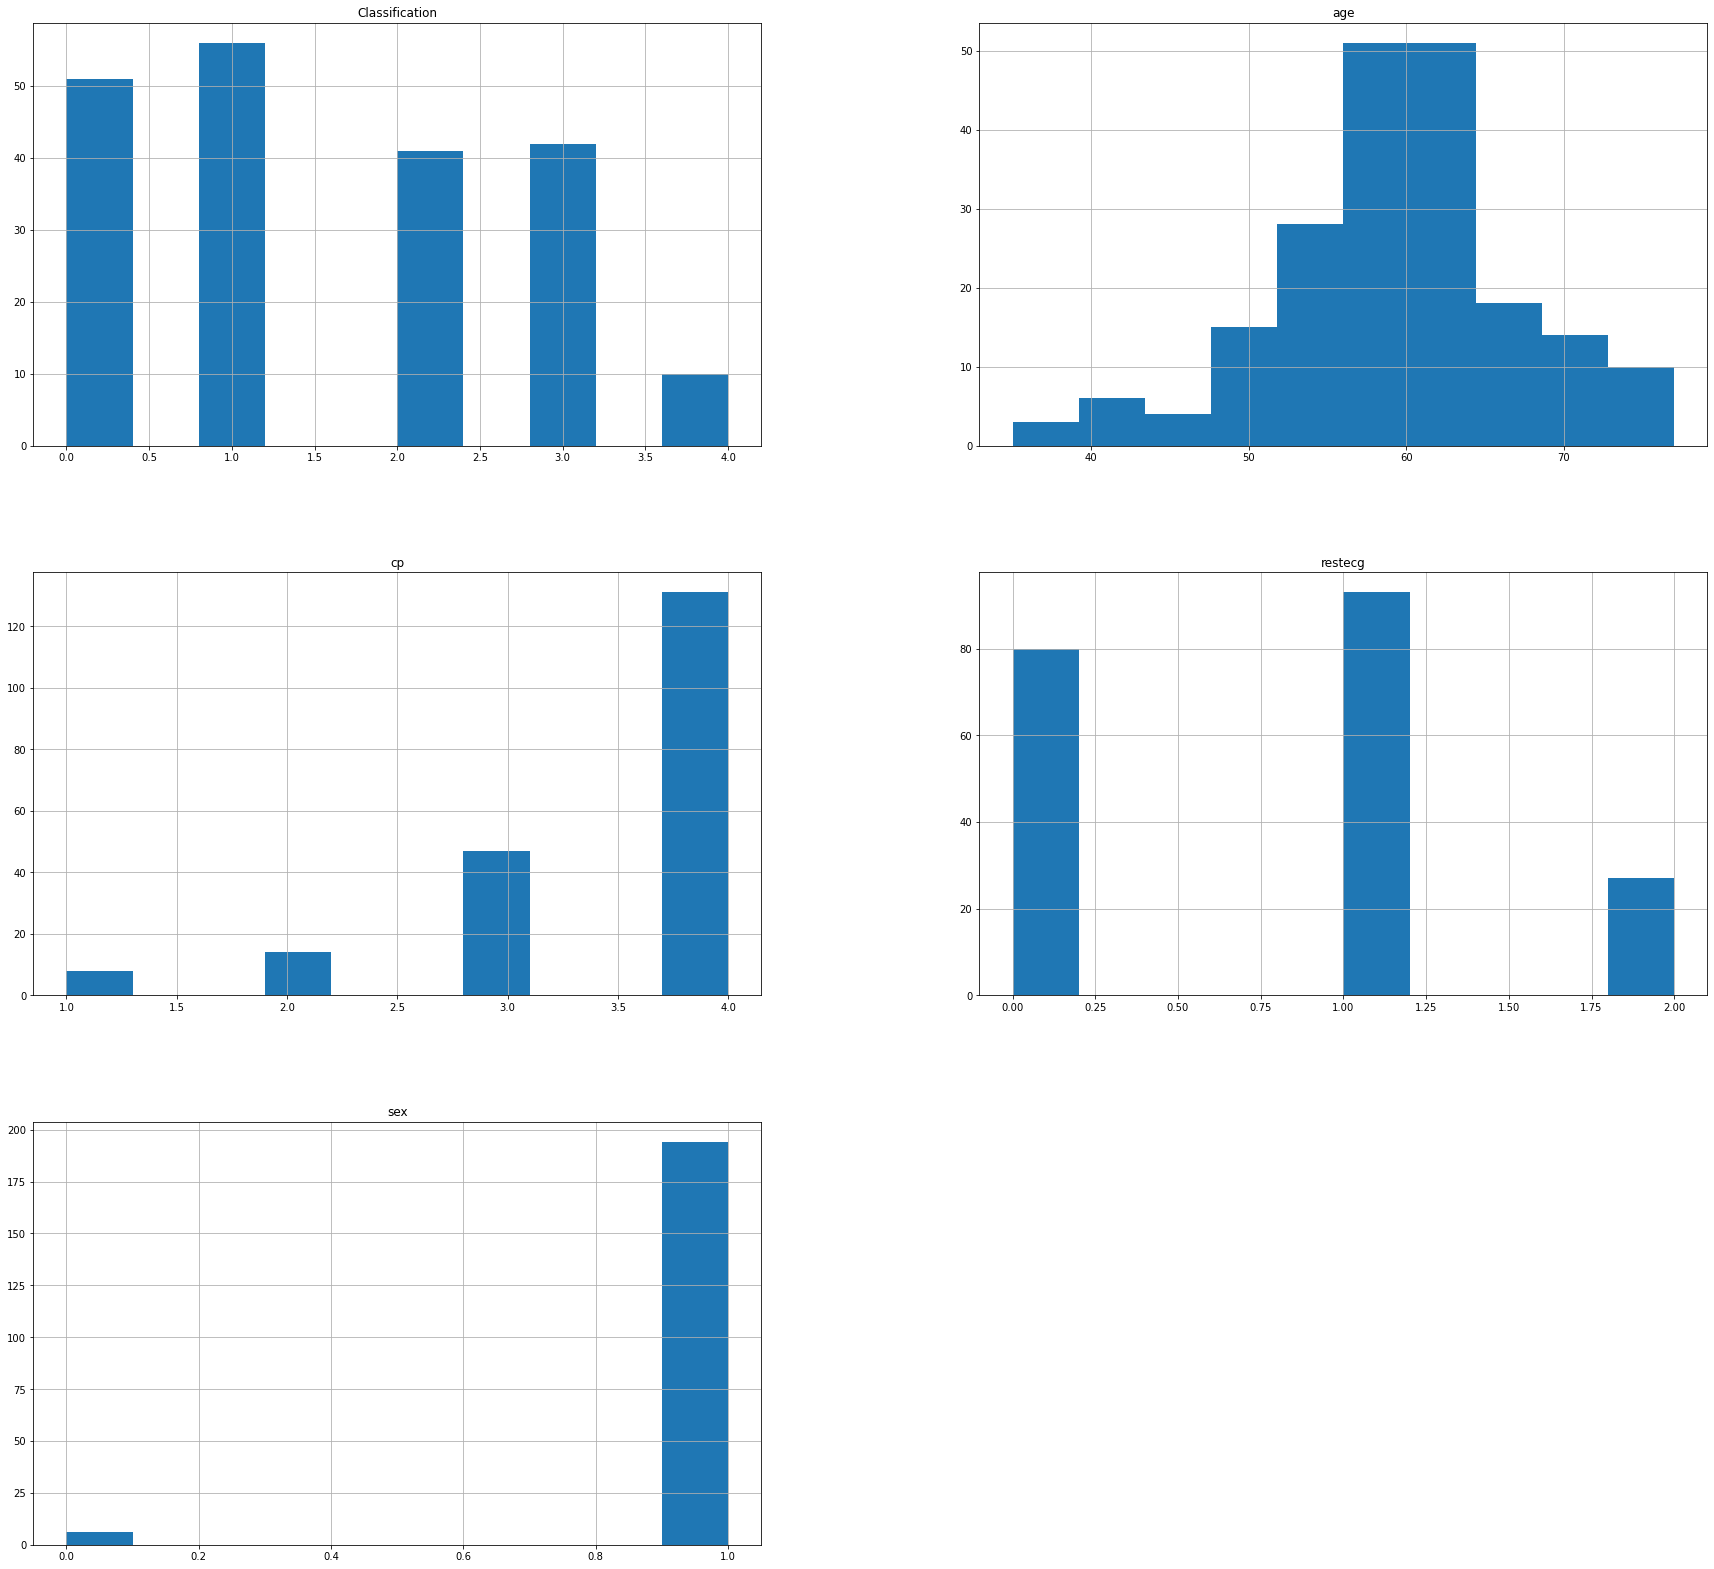

In [8]:
data.hist(figsize=(30,28));

in above histogram for given data we can see some visual representation of Attributes

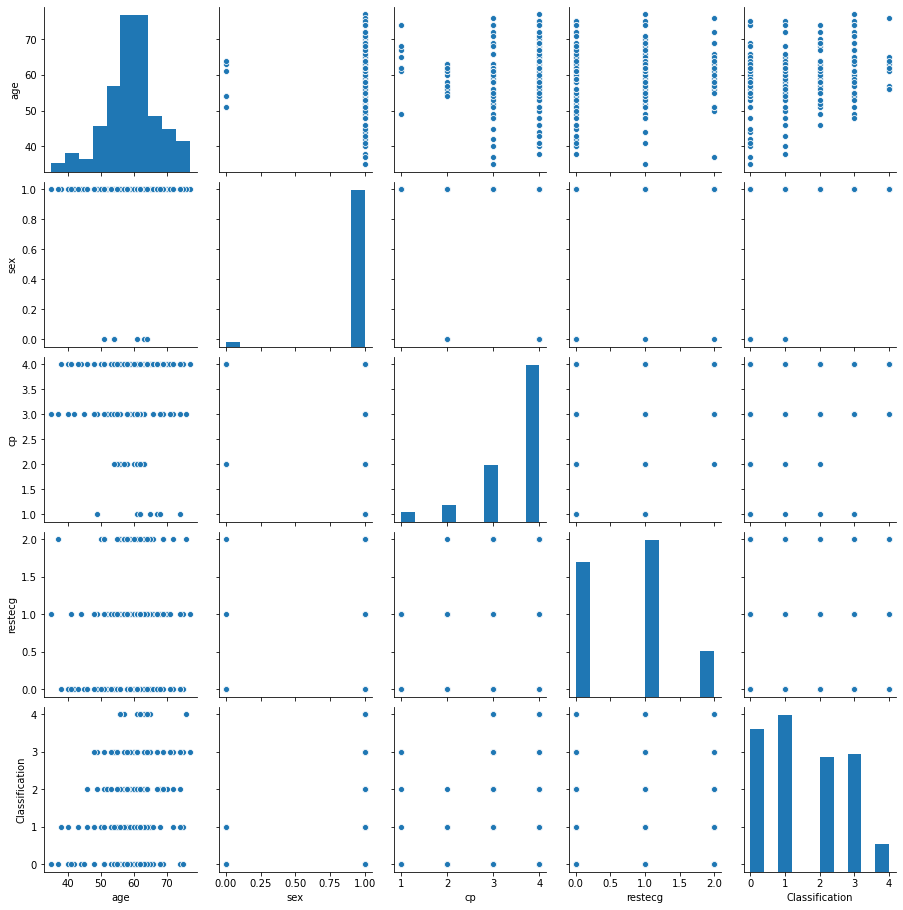

In [9]:
sns.pairplot(data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

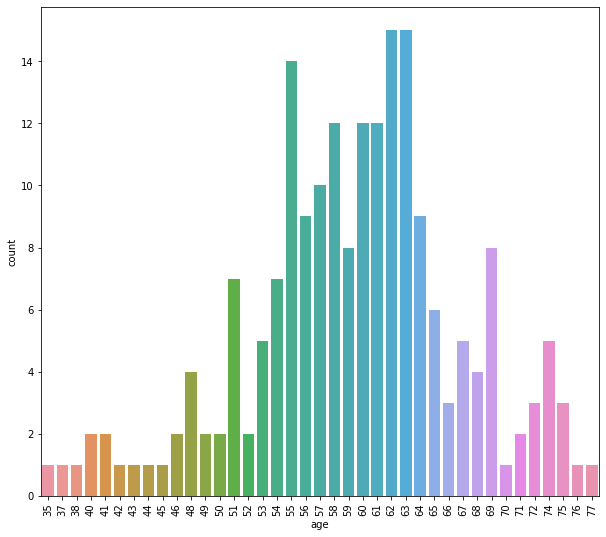

In [10]:
plt.figure(figsize=(10,9))
sns.countplot(data.age)
plt.xticks(rotation=90)

in above graph we can se that age between 51 to 69 has maximum counts for heart disease

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

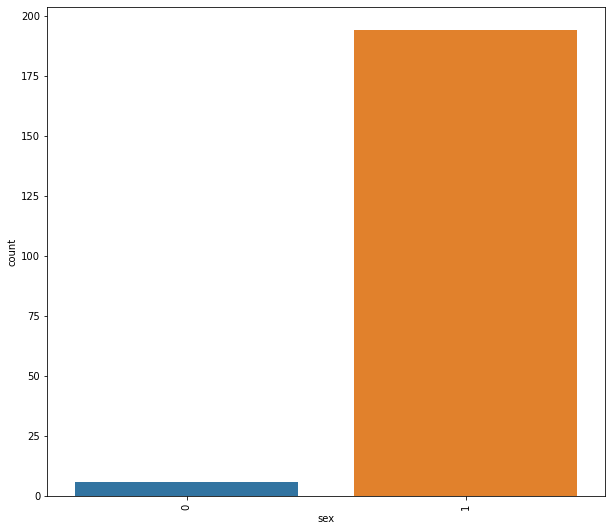

In [11]:
plt.figure(figsize=(10,9))
sns.countplot(data.sex)
plt.xticks(rotation=90)

in sex attributes we can see that sex with represantation of '1' have maximum count for heart related disease

In [12]:
data.drop(['ca'],axis=1,inplace=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,Classification
0,63,1,4,140,260,0,1,112,1,3,2,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,0


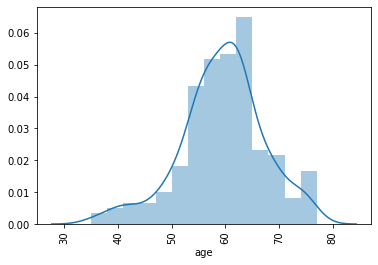

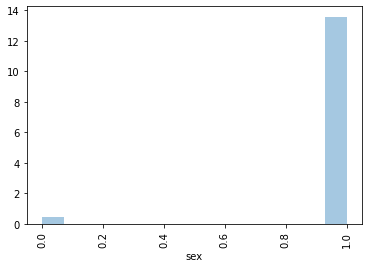

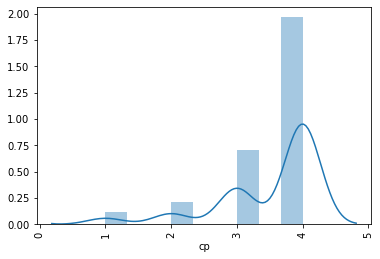

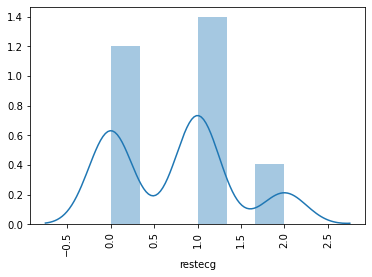

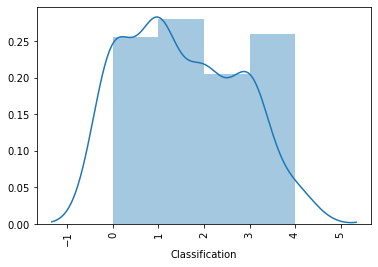

In [13]:
for i in data.describe().columns:
    sns.distplot(data[i])
    plt.xticks(rotation=90)
    plt.show()

we drop CA attribute because it is constant as well as it may not have any impact on our data and then we plots abve graph to see which attributes playing more valueable inputs for our project

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38]),
 <a list of 39 Text major ticklabel objects>)

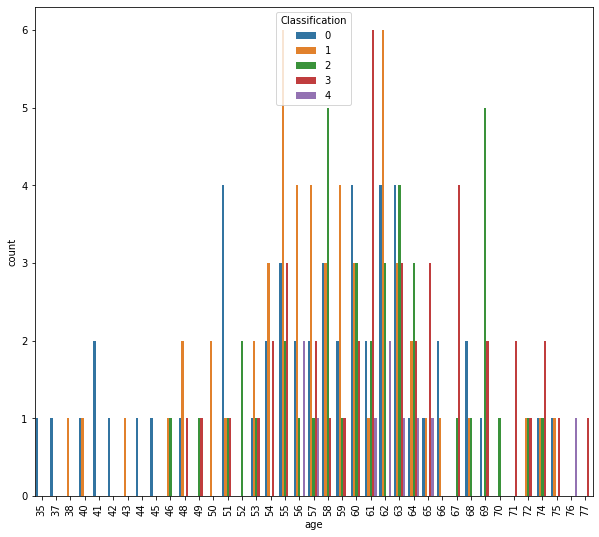

In [14]:
plt.figure(figsize=(10,9))
sns.countplot(x="age",hue="Classification",data=data)
plt.xticks(rotation=90)

In above represantation we can see thaat classification 2 and 3 have higher impact with respect to age 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 <a list of 100 Text major ticklabel objects>)

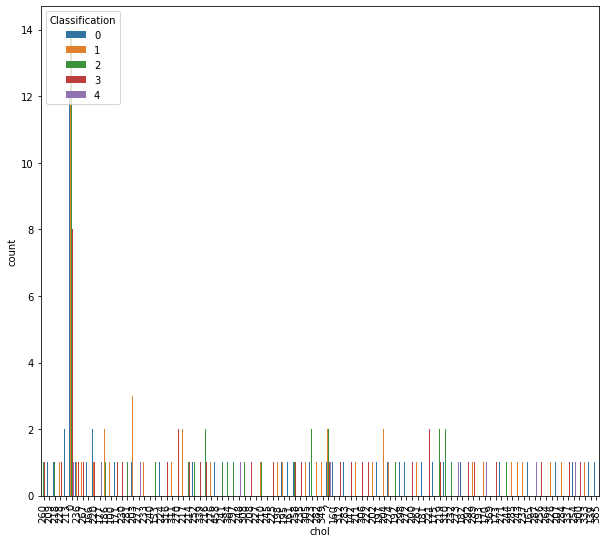

In [15]:
plt.figure(figsize=(10,9))
sns.countplot(x="chol",hue="Classification",data=data)
plt.xticks(rotation=90)

here we can see graphical represantation of Cholestorol level with color represantation of Classification and we can see the mximum counts may comes under 210 to 236

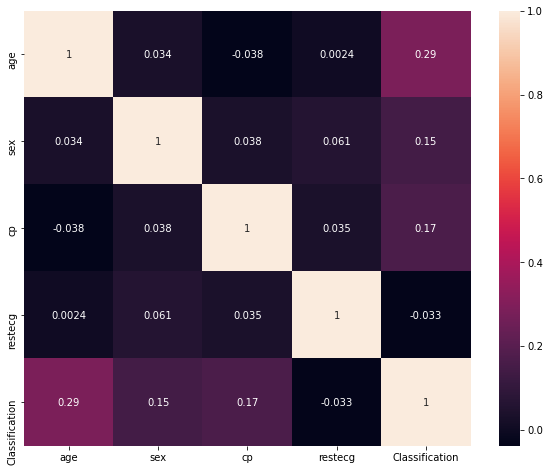

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,vmax=1)
plt.show()

In above Heatmapp we can see the correlation among attributes where age is have most positive correlation

In [24]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,Classification
age,1.000000,0.034230,-0.038280,0.148099,0.075774,0.056644,0.002400,-0.046396,0.082938,0.093662,-0.006737,0.091226,0.287289
sex,0.034230,1.000000,0.038036,0.041150,-0.135882,-0.028341,0.060621,0.003599,0.041667,0.103045,0.042436,0.023543,0.147470
cp,-0.038280,0.038036,1.000000,-0.108668,0.103214,-0.049744,0.034790,-0.245349,-0.082640,-0.191398,-0.184734,-0.088548,0.168210
trestbps,0.148099,0.041150,-0.108668,1.000000,0.137591,0.047729,0.059974,0.535110,0.692549,0.596663,0.402865,0.201645,0.089706
chol,0.075774,-0.135882,0.103214,0.137591,1.000000,0.066625,0.018638,0.121922,0.130986,0.098797,0.059616,0.008680,0.139196
fbs,0.056644,-0.028341,-0.049744,0.047729,0.066625,1.000000,0.114645,0.048343,-0.103918,-0.027321,0.026010,-0.050338,0.046811
restecg,0.002400,0.060621,0.034790,0.059974,0.018638,0.114645,1.000000,0.053506,-0.017562,-0.043575,0.123095,-0.038291,-0.032800
thalach,-0.046396,0.003599,-0.245349,0.535110,0.121922,0.048343,0.053506,1.000000,0.561034,0.537406,0.379412,0.098711,-0.134816
exang,0.082938,0.041667,-0.082640,0.692549,0.130986,-0.103918,-0.017562,0.561034,1.000000,0.709429,0.330265,0.235572,0.070802
oldpeak,0.093662,0.103045,-0.191398,0.596663,0.098797,-0.027321,-0.043575,0.537406,0.709429,1.000000,0.196717,0.272264,0.148194


Here we can see numeric description which show us correlation among all columns also we can see positive and negative correlation which give us idea which attribute is more suitable for our model and data

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             200 non-null    int64 
 1   sex             200 non-null    int64 
 2   cp              200 non-null    int64 
 3   trestbps        200 non-null    object
 4   chol            200 non-null    object
 5   fbs             200 non-null    object
 6   restecg         200 non-null    int64 
 7   thalach         200 non-null    object
 8   exang           200 non-null    object
 9   oldpeak         200 non-null    object
 10  slope           200 non-null    object
 11  thal            200 non-null    object
 12  Classification  200 non-null    int64 
dtypes: int64(5), object(8)
memory usage: 20.4+ KB


In [18]:
label=LabelEncoder()
varib = ['trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',"thal"]
for i in varib:
    data[i]=label.fit_transform(data[i])

data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,Classification
0,63,1,4,23,62,0,1,8,1,11,1,3,2
1,44,1,4,17,28,0,1,21,0,1,3,3,0
2,60,1,4,18,35,0,1,30,1,6,2,3,2
3,55,1,4,24,45,0,1,35,1,10,0,3,1
4,66,1,3,5,31,1,2,58,1,5,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,15,91,1,1,38,0,1,3,3,1
196,62,1,1,40,2,0,1,59,2,14,3,3,0
197,55,1,4,11,40,1,1,0,0,1,3,1,2
198,58,1,4,40,97,1,2,59,2,14,3,3,0


we use Label Encoder for converting object in to Int aswell as we also convert data'?' with integer so we can calculate our model

In [19]:
data.Classification.value_counts()

1    56
0    51
3    42
2    41
4    10
Name: Classification, dtype: int64

we can see here count of clssification 1 is higher than others where count of 4 is minimum in given data

In [20]:
y = data['Classification']
x = data.drop('Classification', axis=1)
data['Classification']= data['Classification']

In [21]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25, random_state=1)

We split our data into Train And Test so we can calculate suitable Model

In [30]:
smoothing={'var_smoothing':[1e-09,None]}
model_test= GaussianNB()
grid=GridSearchCV(estimator=model_test, param_grid=smoothing)

In [32]:
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.var_smoothing)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, None]})
0.2
1e-09
{'var_smoothing': 1e-09}
/n


In [35]:
wei={'weights':['uniform','distance']}
model_test1= KNeighborsClassifier()
grid=GridSearchCV(estimator=model_test1, param_grid=wei)

In [36]:
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.weights)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'weights': ['uniform', 'distance']})
0.3533333333333334
uniform
{'weights': 'uniform'}
/n


In [37]:
neighbor={'n_neighbors':[5,1,2,8,6,10,15,20]}
model_test1= KNeighborsClassifier()
grid=GridSearchCV(estimator=model_test1, param_grid=neighbor)

In [38]:
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_neighbors)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 1, 2, 8, 6, 10, 15, 20]})
0.3533333333333334
5
{'n_neighbors': 5}
/n


In [39]:
leaf={'leaf_size':[50,10,20,80,60,10,30,15,20]}
model_test1= KNeighborsClassifier()
grid=GridSearchCV(estimator=model_test1, param_grid=leaf)

In [40]:
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.leaf_size)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [50, 10, 20, 80, 60, 10, 30, 15, 20]})
0.3533333333333334
50
{'leaf_size': 50}
/n


In [43]:
n_esti={'n_estimators':[50,100,200,800,600,150,300,250,120]}
model_test2= RandomForestClassifier()
grid=GridSearchCV(estimator=model_test2, param_grid=n_esti)

In [44]:
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.n_estimators)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200, 800, 600, 150, 300, 250,
                                          120]})
0.4
150
{'n_estimators': 150}
/n


In [45]:
cri={'criterion':['gini', 'entropy']}
model_test2= RandomForestClassifier()
grid=GridSearchCV(estimator=model_test2, param_grid=cri)

In [46]:
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.criterion)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy']})
0.38
entropy
{'criterion': 'entropy'}
/n


In [49]:
leafS={'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,12,14]}
model_test2= RandomForestClassifier()
grid=GridSearchCV(estimator=model_test2, param_grid=leafS)

In [50]:
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.min_samples_leaf)
print(grid.best_params_)
print('/n')

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12,
                                              14]})
0.39333333333333337
4
{'min_samples_leaf': 4}
/n


In [52]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


import warnings
warnings.filterwarnings('ignore')

model=[LogisticRegression(), SVC(),GaussianNB(var_smoothing=1e-09), DecisionTreeClassifier(),KNeighborsClassifier(weights='uniform',leaf_size=50,n_neighbors=5),RandomForestClassifier(criterion='entropy',n_estimators=150,min_samples_leaf=4)]


for m in model:
    m.fit(train_x,train_y)
    m.score(train_x,train_y)
    predm=m.predict(test_x)
    print('Accuracy Score of',m,'is :')
    print(accuracy_score(test_y,predm))
    print(confusion_matrix(test_y,predm))
    print(classification_report(test_y,predm))
    print('\n')

Accuracy Score of LogisticRegression() is :
0.26
[[6 7 1 0 0]
 [4 6 2 3 1]
 [0 3 0 1 1]
 [4 1 5 1 1]
 [1 1 1 0 0]]
              precision    recall  f1-score   support

           0       0.40      0.43      0.41        14
           1       0.33      0.38      0.35        16
           2       0.00      0.00      0.00         5
           3       0.20      0.08      0.12        12
           4       0.00      0.00      0.00         3

    accuracy                           0.26        50
   macro avg       0.19      0.18      0.18        50
weighted avg       0.27      0.26      0.26        50



Accuracy Score of SVC() is :
0.26
[[7 1 5 1 0]
 [5 2 7 2 0]
 [1 2 2 0 0]
 [3 4 3 2 0]
 [1 0 0 2 0]]
              precision    recall  f1-score   support

           0       0.41      0.50      0.45        14
           1       0.22      0.12      0.16        16
           2       0.12      0.40      0.18         5
           3       0.29      0.17      0.21        12
           4       0.00

In above we can see that Random Forest giving us Maximum accuracy

In [53]:
import joblib

In [55]:
joblib.dump(RandomForestClassifier(criterion='entropy',n_estimators=150,min_samples_leaf=4),'M20_P5_HeartDisease.obj')

['M20_P5_HeartDisease.obj']